In [18]:
import sys
sys.path.append('..')
from backtester import matlab, backtester
from backtester.analysis import *
import pandas as pd
import numpy as np

In [15]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
d, info = matlab.loaddata('../mat/strategy_270225.mat')

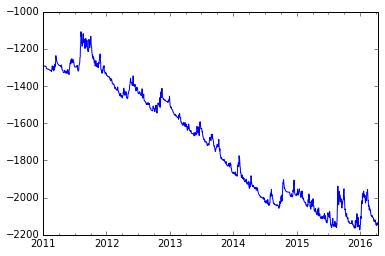

In [4]:
d.exo.plot();

In [5]:
info

{'legs': 4,
 'name': 'BearishCollarBrokenWing',
 'pcf': array([1, 2, 0, 1], dtype=uint8),
 'pcfqty': array([-1, -1,  1,  1], dtype=int16),
 'tickincrement': 0.25,
 'tickvalue': 12.5,
 'underlying': 'EP'}

<h1>Simple entry and exit rules based on MA crossing</h1>

In [12]:
slow_ma = pd.rolling_mean(d.exo, 50)
fast_ma = pd.rolling_mean(d.exo, 20)

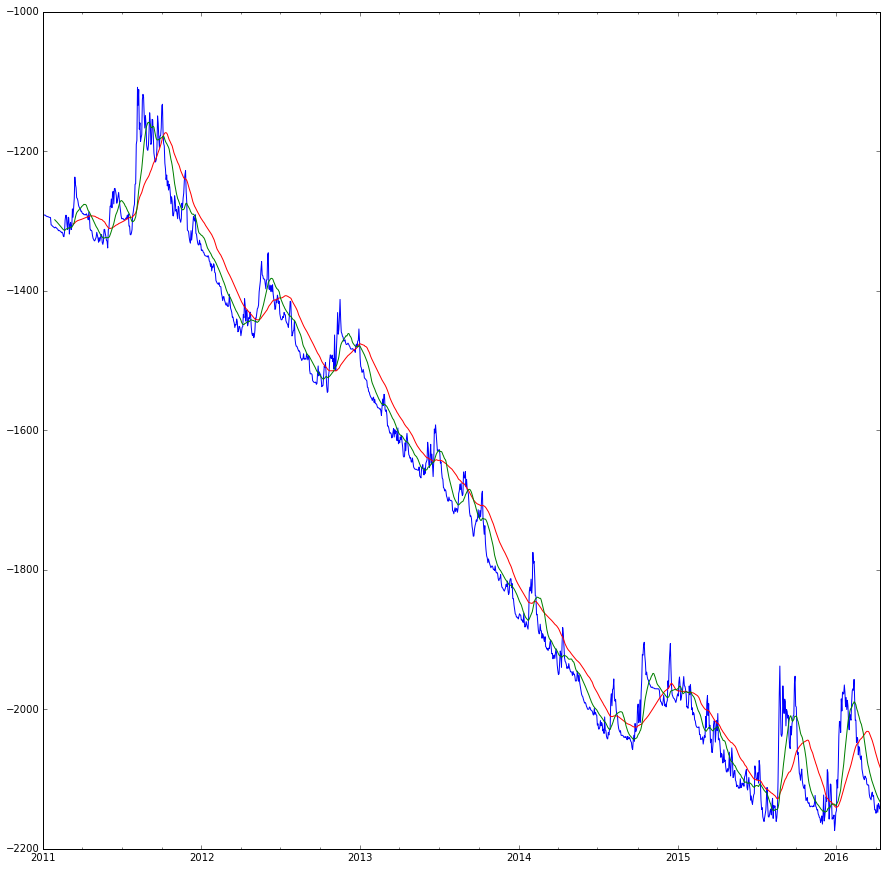

In [17]:
figsize(15, 15)
d.exo.plot()
slow_ma.plot(c='r')
fast_ma.plot(c='g')

# Entry rules

* Enter short when fast MA crosses down slow MA
* Exit when fast MA crosses up slow MA


In [19]:
short_entry = CrossDown(fast_ma, slow_ma)
short_exit = CrossUp(fast_ma, slow_ma)

<h1>Backtest results</h2>

In [23]:
direction = -1
pl, inposition = backtester.backtest(d, short_entry, short_exit, direction )
equity, stats = backtester.stats(pl, inposition)

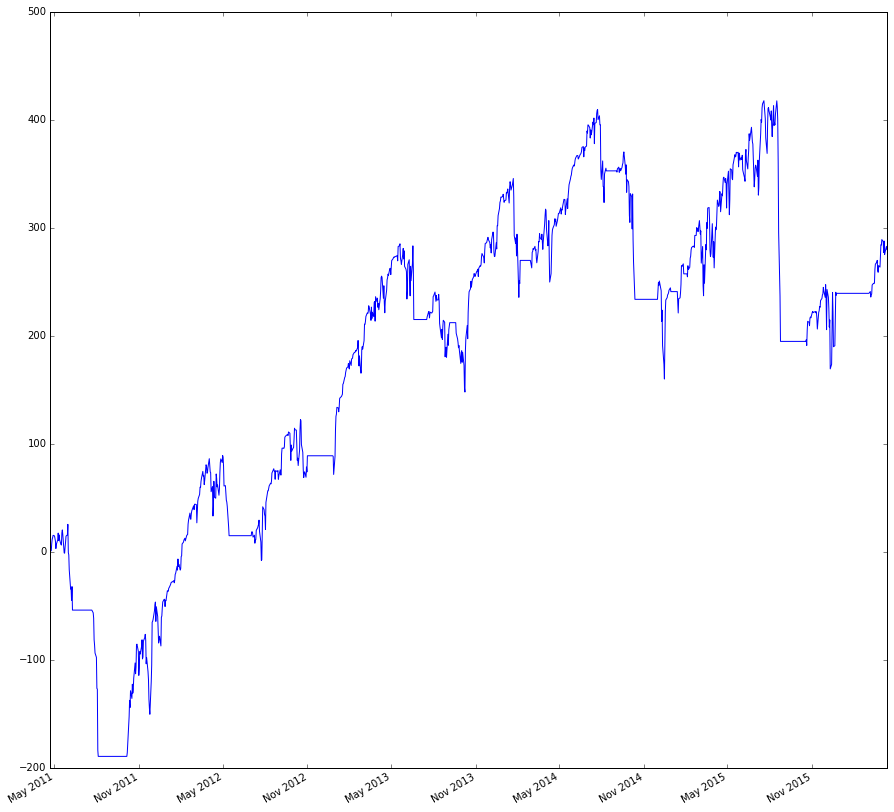

In [24]:
equity.plot()

In [25]:
stats

{'avg': 18.411538461538438,
 'count': 13,
 'maxdd': -249.49999999999977,
 'netprofit': 239.34999999999968,
 'std': 92.223462211351233,
 'winrate': 0.6153846153846154}